### Importing required libraries

In [1]:
# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import stats for performing statistical tests
import scipy.stats as stats

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import KFold,GridSearchCV

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

# import KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# import Naive Bayes 
from sklearn.naive_bayes import GaussianNB

# import Stacking Classifier
from sklearn.ensemble import StackingClassifier

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# Creating custom colors

colors = ['#b30000','#008080','#cd0000','#00cdcd']

### Read the dataset and view the first 10 rows of it.

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Check the shape/dimension of the dataset

In [4]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'The dimension of the dataset is {df.ndim}')

The dataset has 5110 rows and 12 columns
The dimension of the dataset is 2


### Check for the missing values.Display number of missing values per column

In [5]:
missing_values = pd.DataFrame(columns = ['Name','No of missing values','% of missing values'])

missing_values['Name'] = df.columns
missing_values['No of missing values'] = df.isnull().sum().values
missing_values['% of missing values'] = (df.isnull().sum() / len(df)).values * 100

missing_values

,Name,No of missing values,% of missing values
0,id,0,0.000000
1,gender,0,0.000000
2,age,0,0.000000
3,hypertension,0,0.000000
4,heart_disease,0,0.000000
5,ever_married,0,0.000000
6,work_type,0,0.000000
7,Residence_type,0,0.000000
8,avg_glucose_level,0,0.000000
9,bmi,201,3.933464


From above we can see that there 201(3.93%) missing values in bmi variable

### Investigate and predict the missing BMI Value

Using Height and Weight of a person we can calculate bmi. Since height and weight is not given. We can find bmi with the help of gender variable. Almost bmi within the genders will be more or less same. 

In [6]:
bmi_map = df.groupby(by = 'gender')['bmi'].median()
indices = df[df['bmi'].isnull()].index.to_list()

In [7]:
df.loc[indices,'bmi'] = df['gender'].map(bmi_map)

In [8]:
df['bmi'].isnull().sum()

0

Missing values has been treated

### Check the datatype, number of non null values and name of each variable in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Check the descriptive statistics of the dataset.

In [10]:
df.describe(include = object)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### Visualize the proportion of Stroke samples in the dataset

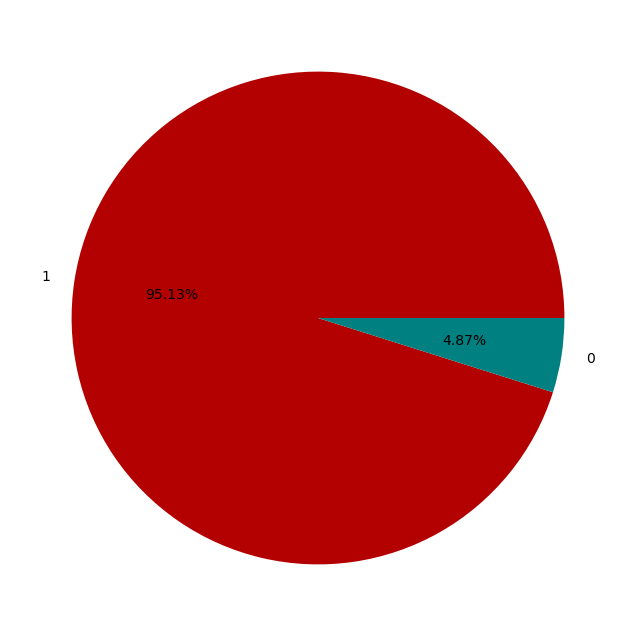

In [11]:
plt.pie(df['stroke'].value_counts(), autopct = '%.2f%%',labels = df['stroke'].unique(),colors = colors)
plt.show()

### Visualize the Distribution of Male and Female Ages

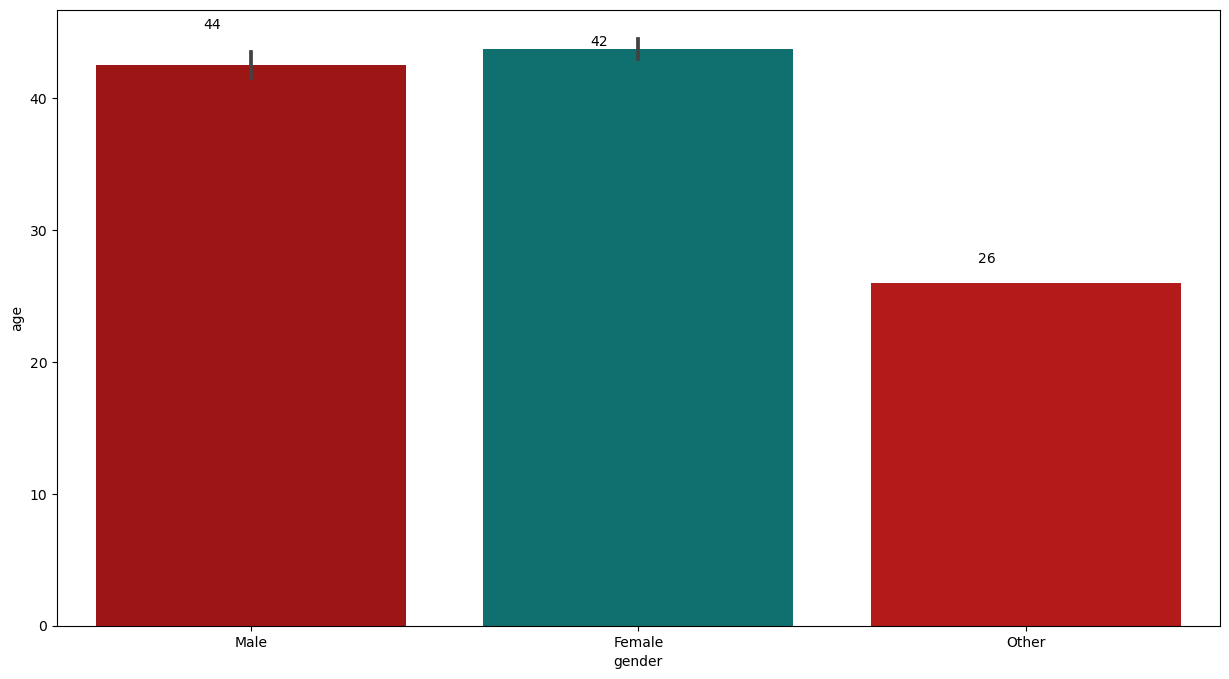

In [12]:
sns.barplot(x = df['gender'], y = df['age'], palette = colors)
for i,v in enumerate(round(df.groupby(by = 'gender')['age'].mean(),3)):
    plt.text(x = i - 0.1, y = v + 1.5 , s = round(v), ha = 'center')

### Visualize the stroke sample based on
- a) BMI and Glucose Level
- b) BMI and Age

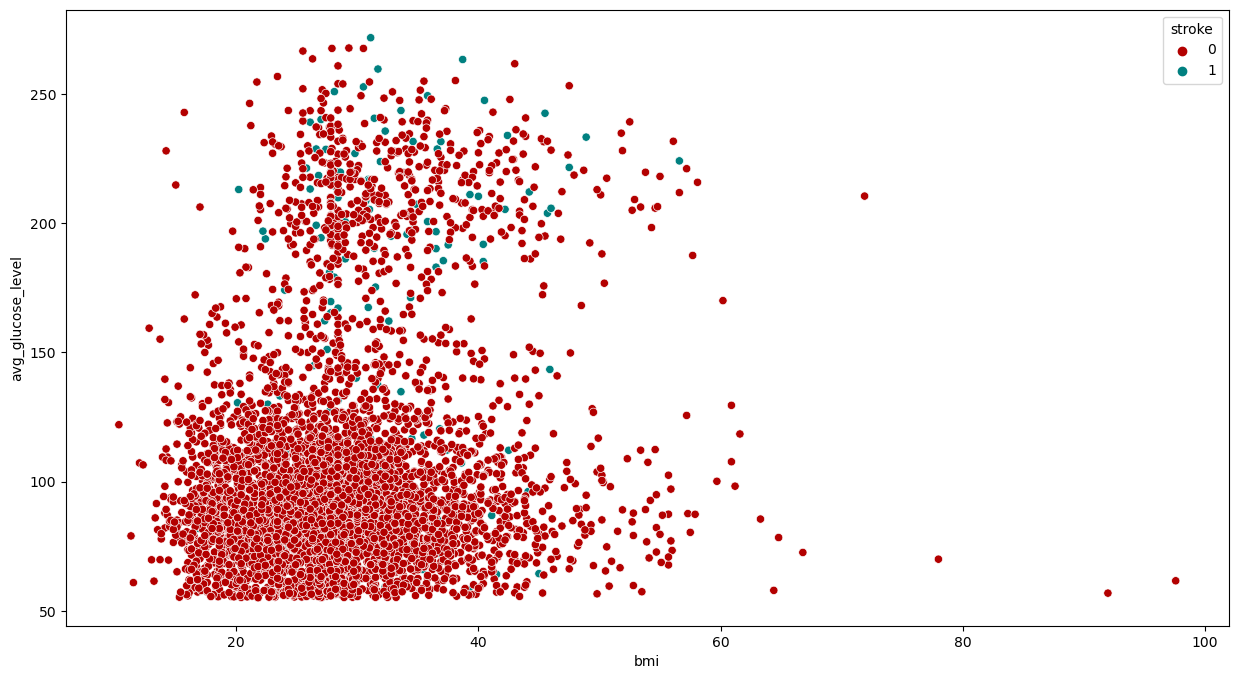

In [13]:
sns.scatterplot(x = df['bmi'], y = df['avg_glucose_level'], hue = df['stroke'],palette = ['#b30000','#008080'] )
plt.show()

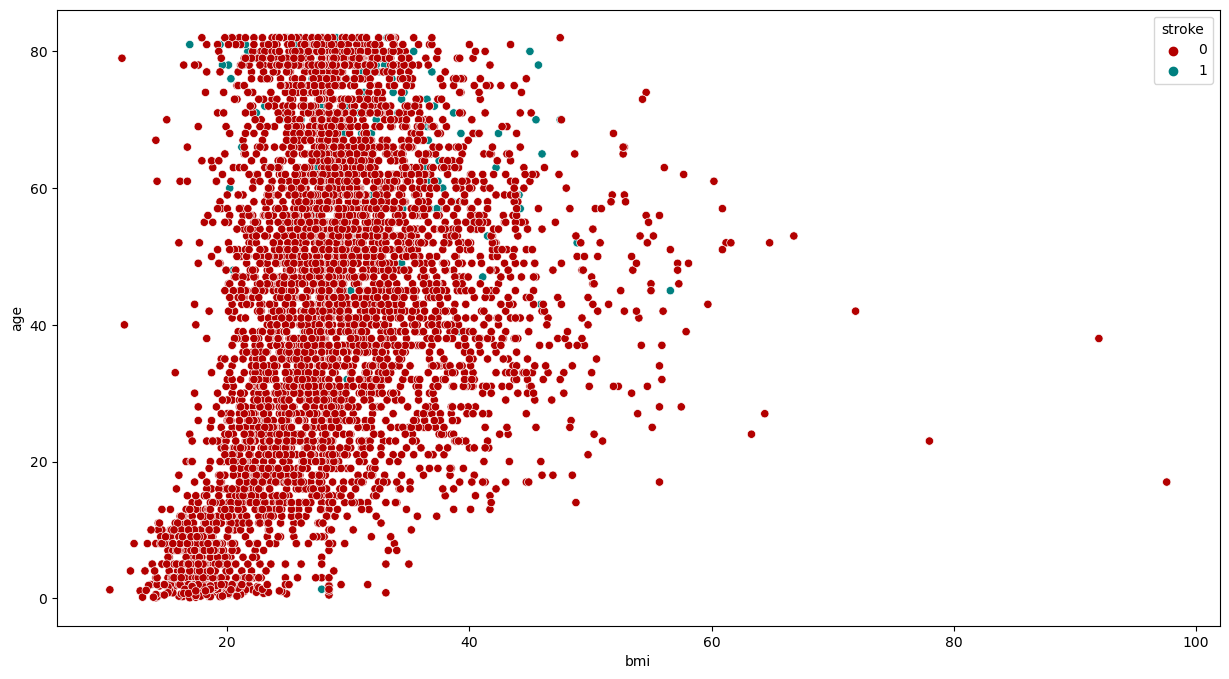

In [14]:
sns.scatterplot(x = df['bmi'], y = df['age'], hue = df['stroke'], palette = ['#b30000','#008080'])
plt.show()

### Using the pie chart visualizes the proportion of different smoking categories among the stroke population

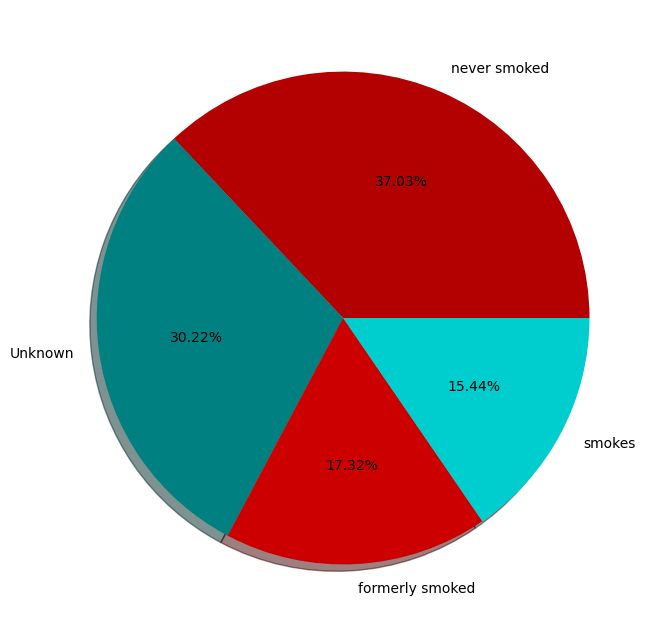

In [15]:
s = df['smoking_status'].value_counts()

plt.pie(s , labels = s.index, autopct = '%.2f%%', shadow = True, colors = colors )
plt.show()

From above plot we can see that there are 37% of total proportion people have not smoked. 15.44% and 17.32% people smoke, the latter one is the proportion of people who were formerly smoked. For almost 30.22% we dont have the detials of smoking status

### Perform hypothesis testing to find the significant variables

In [16]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:
# Id is a numerical column and stroke is categorical column.
# Numerical vs Categorical - f_oneway test

stats.f_oneway(df['id'],df['stroke'])

F_onewayResult(statistic=15216.951506337784, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between Id and Stroke. Statistically this is the result but logically id doesnot contribute to stroke. So it can be dropped

In [18]:
# Gender is categorical variable
# Categorical vs Categorical - chi2_contingency test

ge = pd.crosstab(df['gender'], df['stroke'])

stats.chi2_contingency(ge)

(0.47258662884530234,
 0.7895490538408245,
 2,
 array([[2.84810841e+03, 1.45891585e+02],
        [2.01194031e+03, 1.03059687e+02],
        [9.51272016e-01, 4.87279843e-02]]))

Since pval is more than significance level , failed to reject H0. There is no significant relationship between Gender and Stroke.

In [19]:
# Age is a Numerical column
# # Num vs Cat - f_oneway test

stats.f_oneway(df['age'],df['stroke'])

F_onewayResult(statistic=18629.512456960387, pvalue=0.0)

since pvalue is less than significance level, reject H0. There is significant relationship between age and Stroke. 

In [20]:
# Hypertension is categorical variable
# Categorical vs Categorical - chi2_contingency test

ht = pd.crosstab(df['hypertension'],df['stroke'])

stats.chi2_contingency(ht)

(81.6053682482931,
 1.661621901511823e-19,
 1,
 array([[4387.2665362,  224.7334638],
        [ 473.7334638,   24.2665362]]))

Since pval is less than significance level , reject H0. There is significant relationship between Hypertension and Stroke.

In [21]:
# Heartdisease is categorical variable
# Categorical vs Categorical - chi2_contingency test

hd = pd.crosstab(df['heart_disease'],df['stroke'])

stats.chi2_contingency(hd)

(90.25956125843324,
 2.0887845685229236e-21,
 1,
 array([[4598.44892368,  235.55107632],
        [ 262.55107632,   13.44892368]]))

Since pval is less than significance level , reject H0. There is significant relationship between Heartdisease and Stroke.

In [22]:
# Evermarried is categorical variable
# Categorical vs Categorical - chi2_contingency test

hd = pd.crosstab(df['ever_married'],df['stroke'])

stats.chi2_contingency(hd)

(58.923890259034195,
 1.6389021142314745e-14,
 1,
 array([[1671.38493151,   85.61506849],
        [3189.61506849,  163.38493151]]))

since pvalue is less than significance level, reject H0. There is significant relationship between evermarried and Stroke. Statistically this is the result but logically id doesnot contribute to stroke. So it can be dropped

In [23]:
# worktype is categorical variable
# Categorical vs Categorical - chi2_contingency test

hd = pd.crosstab(df['work_type'],df['stroke'])

stats.chi2_contingency(hd)

(49.163511976675295,
 5.397707801896119e-10,
 4,
 array([[6.24985714e+02, 3.20142857e+01],
        [2.09279843e+01, 1.07201566e+00],
        [2.78247065e+03, 1.42529354e+02],
        [7.79091781e+02, 3.99082192e+01],
        [6.53523875e+02, 3.34761252e+01]]))

Since pval is less than significance level , reject H0. There is significant relationship between worktype and Stroke.

In [24]:
# residencetype is categorical variable
# Categorical vs Categorical - chi2_contingency test

hd = pd.crosstab(df['Residence_type'],df['stroke'])

stats.chi2_contingency(hd)

(1.0816367471627524,
 0.29833169286876987,
 1,
 array([[2391.49784736,  122.50215264],
        [2469.50215264,  126.49784736]]))

Since pval is more than significance level , failed to reject H0. There is no significant relationship between residencetype and Stroke.

In [25]:
# avg_glucose_level is a Numerical column
# # Num vs Cat - f_oneway test

stats.f_oneway(df['avg_glucose_level'],df['stroke'])

F_onewayResult(statistic=28051.24356889678, pvalue=0.0)

Since pval is less than significance level , reject H0. There is significant relationship between avg_glucose_level and Stroke.

In [26]:
# bmi is a Numerical column
# # Num vs Cat - f_oneway test

stats.f_oneway(df['bmi'],df['stroke'])

F_onewayResult(statistic=71503.38339547647, pvalue=0.0)

Since pval is less than significance level , reject H0. There is significant relationship between bmi and Stroke.

In [27]:
# smoking_status is categorical variable
# Categorical vs Categorical - chi2_contingency test

ss = pd.crosstab(df['smoking_status'],df['stroke'])

stats.chi2_contingency(ss)

(29.147269191399264,
 2.0853997025008455e-06,
 3,
 array([[1468.76399217,   75.23600783],
        [ 841.87573386,   43.12426614],
        [1799.80665362,   92.19334638],
        [ 750.55362035,   38.44637965]]))

Since pval is less than significance level , reject H0. There is significant relationship between smoking_status and Stroke.

### Drop the unnecessary columns

In [28]:
df.drop(columns = ['id','gender','ever_married','Residence_type'], inplace = True)

### Write the code to replace following categories columns in integer format as follow –

- a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
- b) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [29]:
df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':1,'Never_worked':-2},inplace=True)
df['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1},inplace=True)

In [30]:
df[['work_type','smoking_status']]

,work_type,smoking_status
0,0,2
1,1,0
2,0,0
3,0,-1
4,1,0
...,...,...
5105,0,0
5106,1,0
5107,1,0
5108,0,2


### Check the distribution of 'bmi' and 'stroke' columns in the dataset.

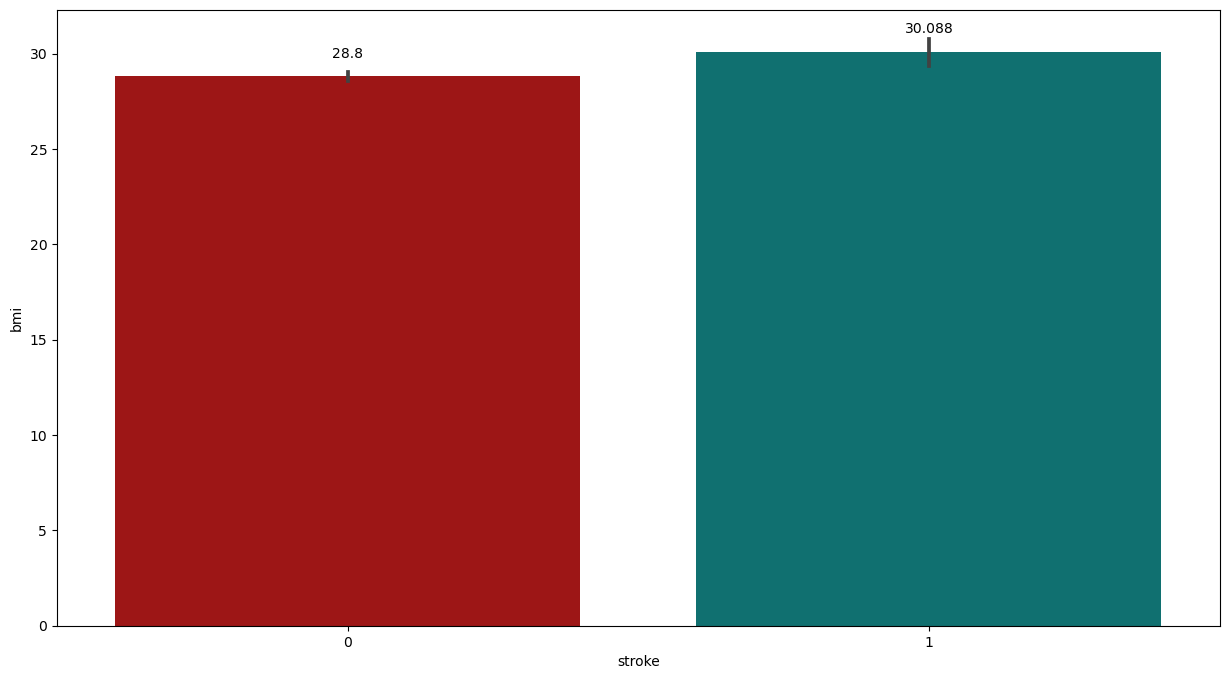

In [31]:
sns.barplot(x = df['stroke'], y = df['bmi'], palette = colors)

for i,v in enumerate(round(df.groupby(by = 'stroke')['bmi'].mean(),3)):
    plt.text(x = i , y = v + 1, s = v, ha = 'center')

### List down columns that are highly skewed

In [32]:
df.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
work_type            0.679586
avg_glucose_level    1.572284
bmi                  1.087931
smoking_status       0.082279
stroke               4.193284
dtype: float64

In [33]:
df.skew()[(df.skew() > 0.5) | (df.skew() < -0.5)].index

Index(['hypertension', 'heart_disease', 'work_type', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

### List down the columns that are highly kurtosis.

In [34]:
df.kurtosis()[df.kurtosis() > 3].index

Index(['hypertension', 'heart_disease', 'bmi', 'stroke'], dtype='object')

### Find the distribution of all variables with respect to the outcome 'stroke' variable

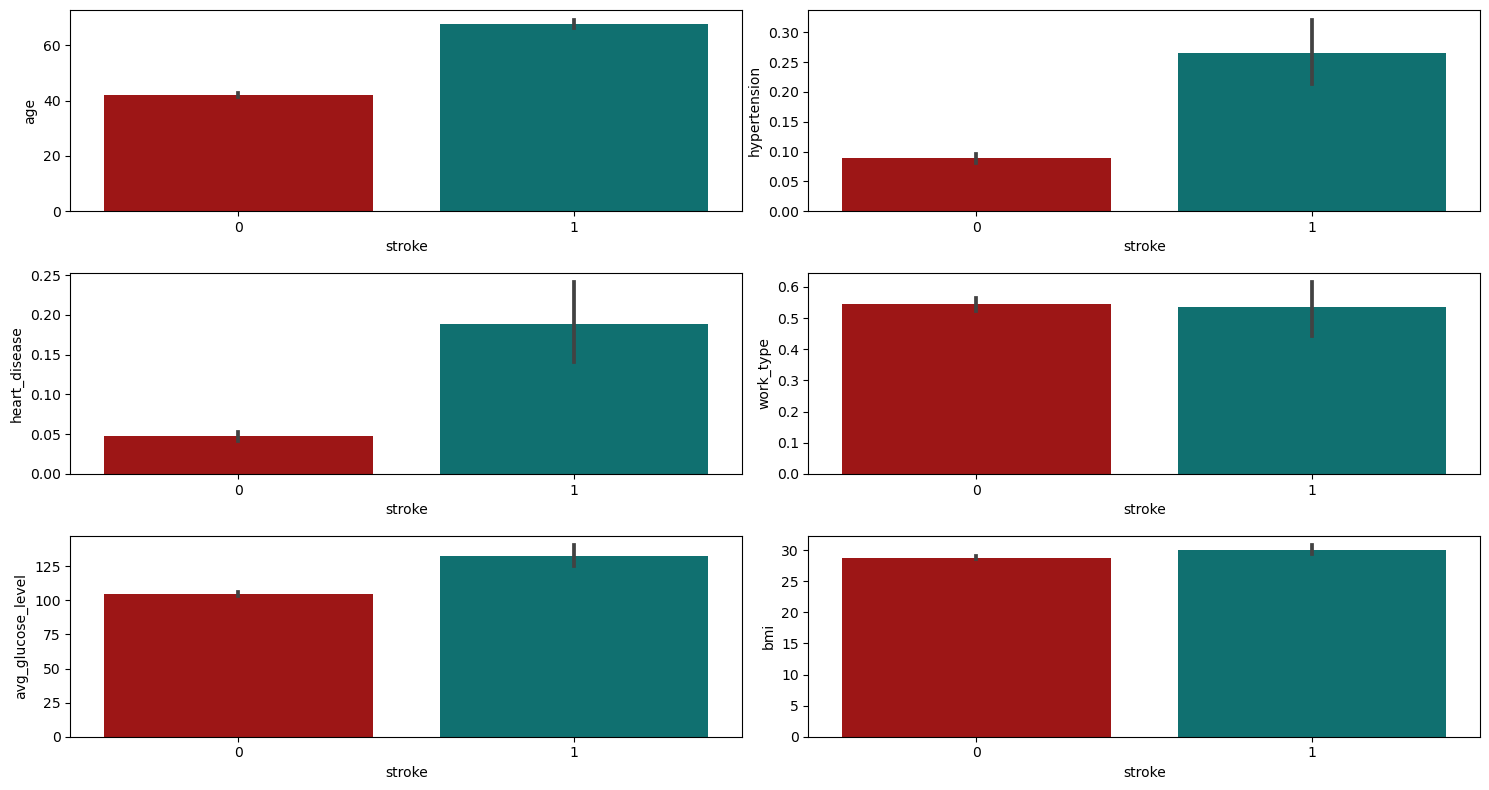

In [35]:
x = df.drop(columns = 'stroke')

f,ax = plt.subplots(3,2)
for i,v in zip(x.columns,ax.flatten()):
    sns.barplot(x = df['stroke'], y = df[i], ax = v, palette = colors)
plt.tight_layout()
plt.show()

### Plot the heatmap for correlation matrix for the given dataset. Write the observation.

<AxesSubplot:>

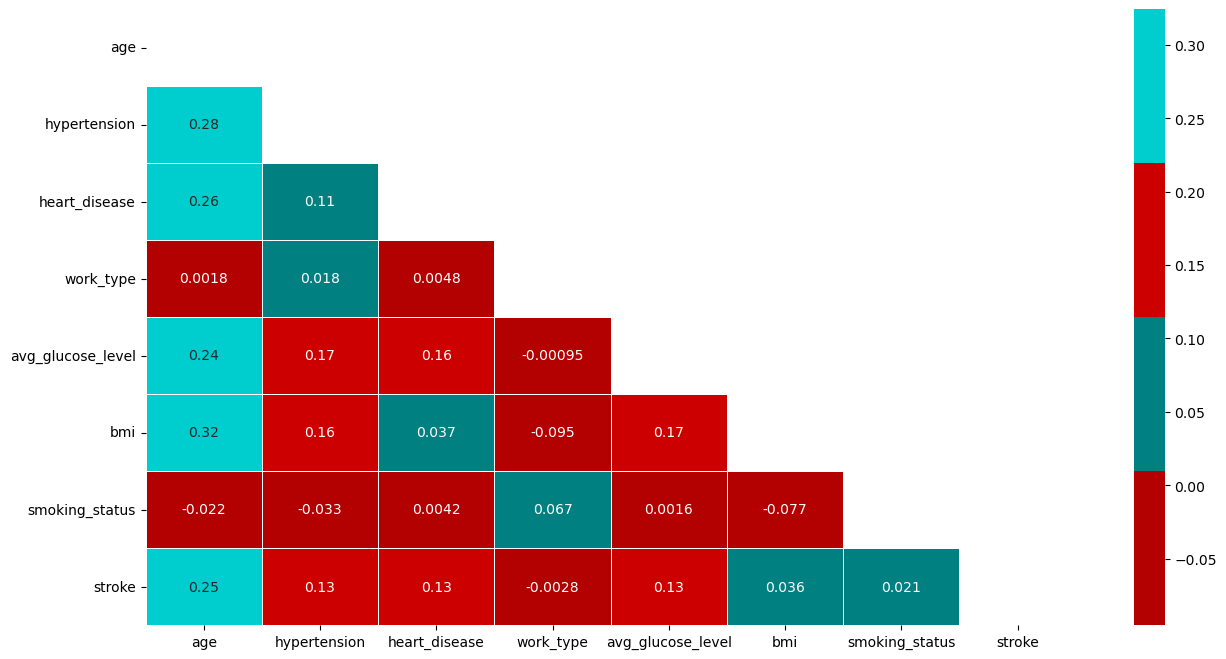

In [36]:
# colors = ['#97C1A9','#FFFFFF']

sns.heatmap(df.corr(), annot = True, cmap = colors , mask = np.triu(df.corr()), linewidth = 0.5)

From the above heatmap it is clearly evident that no columns are highly correlated

### Plot the boxplot to check for outliers

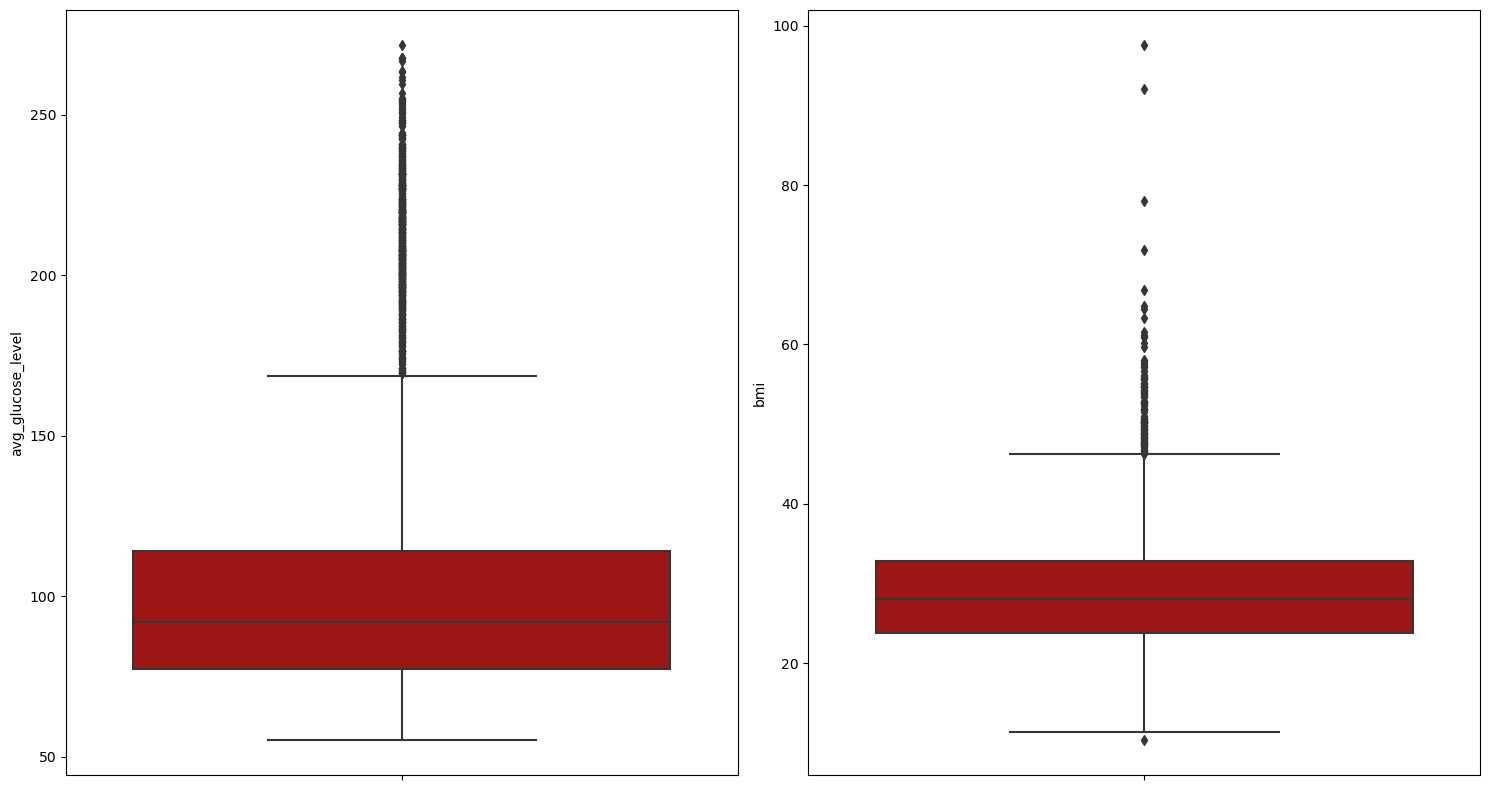

In [37]:
f,ax = plt.subplots(1,2)

for i,v in zip(df[['avg_glucose_level','bmi']].columns,ax.flatten()):
    sns.boxplot(y = df[i], ax = v, palette = ['#b30000','#008080'])
plt.tight_layout()
plt.show()

From above boxplot it is claerly evident that there are outliers present in the data

### Treatment of outliers using PowerTransformer method

In [38]:
pt = PowerTransformer()

df[['avg_glucose_level','bmi']] = pt.fit_transform(df[['avg_glucose_level','bmi']])

df.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,0,1.862358,1.045304,2,1
1,61.0,0,0,1,1.700414,-0.014465,0,1
2,80.0,0,1,0,0.394714,0.587586,0,1
3,49.0,0,0,0,1.444941,0.806512,-1,1
4,79.0,1,0,1,1.472748,-0.580853,0,1


### Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

In [39]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

We have to generate synthetic data using SMOTE to avoid imbalance in the target variable

In [40]:
sm = SMOTE()

x = df.drop(columns = 'stroke')
y = df['stroke']

x_resampled, y_resampled = sm.fit_resample(x,y)

y_resampled.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

Imbalance in the target variable is rectified using Synthetic Minority Over Sampling Technique

### Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio

In [41]:
xtrain , xtest , ytrain , ytest = train_test_split(x_resampled, y_resampled, test_size = 0.30)

### Building different models and evaluating using appropriate technique

In [42]:
# Creating a user defined function to store values of accuracy , f1 score , auc_score of both train and test data 

performance_df = pd.DataFrame(columns = ['Model_name','Train_Accuracy','Train_F1score','Test_Accuracy',
                                         'Test_F1score','AUC_Score','Remarks'])

def model_performance(model,name):
    global performance_df
    
    # predicting train and test data

    pred_train = model.predict(xtrain)
    pred_test = model.predict(xtest)
    pred_prob_test = model.predict_proba(xtest)[:,1]
    
    # calculating metrics for both train and test
    
    train_acc = accuracy_score(ytrain,pred_train)
    test_acc = accuracy_score(ytest,pred_test)
    train_f1 = f1_score(ytrain,pred_train)
    test_f1 = f1_score(ytest,pred_test)
    auc_score = roc_auc_score(ytest,pred_prob_test)
    
    # defining function for remarks
    
    def remark(train_acc,test_acc):
        if abs(train_acc - test_acc) > 0.2 or train_acc > 0.95:
            return 'Over Fit'
        elif train_acc < 0.8 or test_acc < 0.8:
            return 'Under Fit'
        else:
            return 'Good Fit'
        
        
    # adding train and test scores in performance_df dataframe
    
    performance_df = performance_df.append({'Model_name':name,'Train_Accuracy':train_acc,'Train_F1score':train_f1,
                                           'Test_Accuracy':test_acc,'Test_F1score':test_f1,
                                           'AUC_Score':auc_score,'Remarks':remark(train_acc,test_acc)},ignore_index=True)
    
    # plotting roc_curve and calculating auc_score
    
    fpr , tpr , threshold = roc_curve(ytest,pred_prob_test)
    
    plt.plot(fpr,tpr)
    plt.plot([0.0,1.0],'r--')
    plt.text(x = 0.1, y = 1.0 , s = ('auc_score',round((roc_auc_score(ytest,pred_test)),4)))

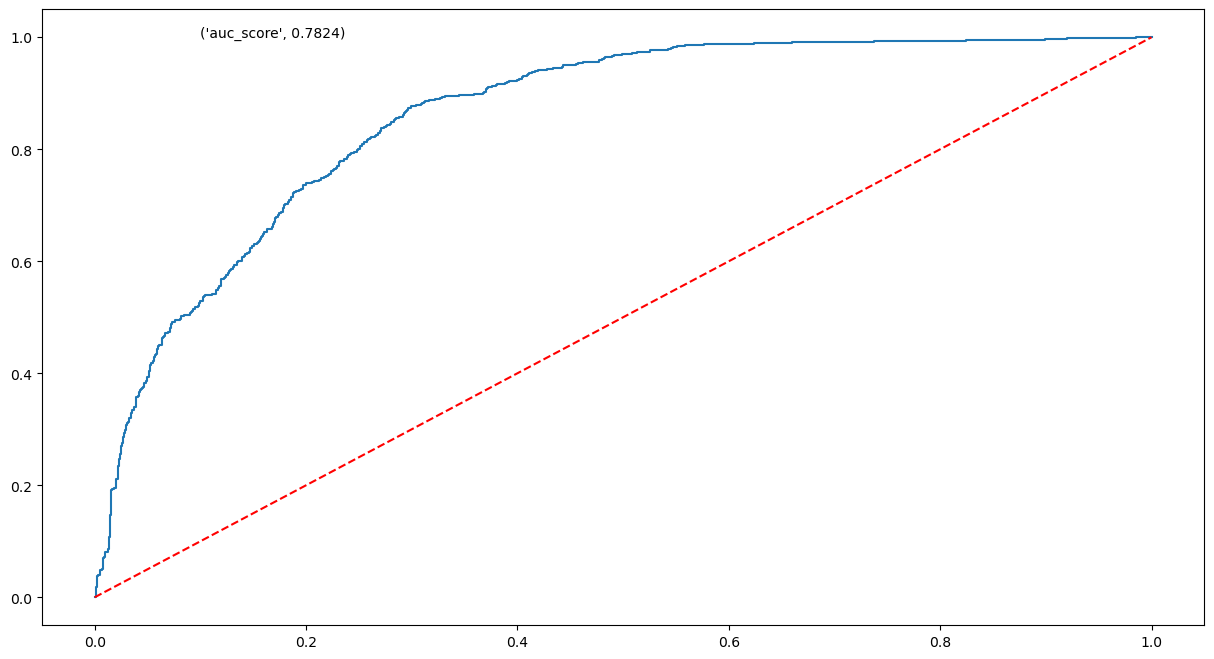

In [43]:
# Logistic Regression Model

model_lr = LogisticRegression().fit(xtrain,ytrain)

model_performance(model_lr,name = 'Logistic Model')


### DecisionTree

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

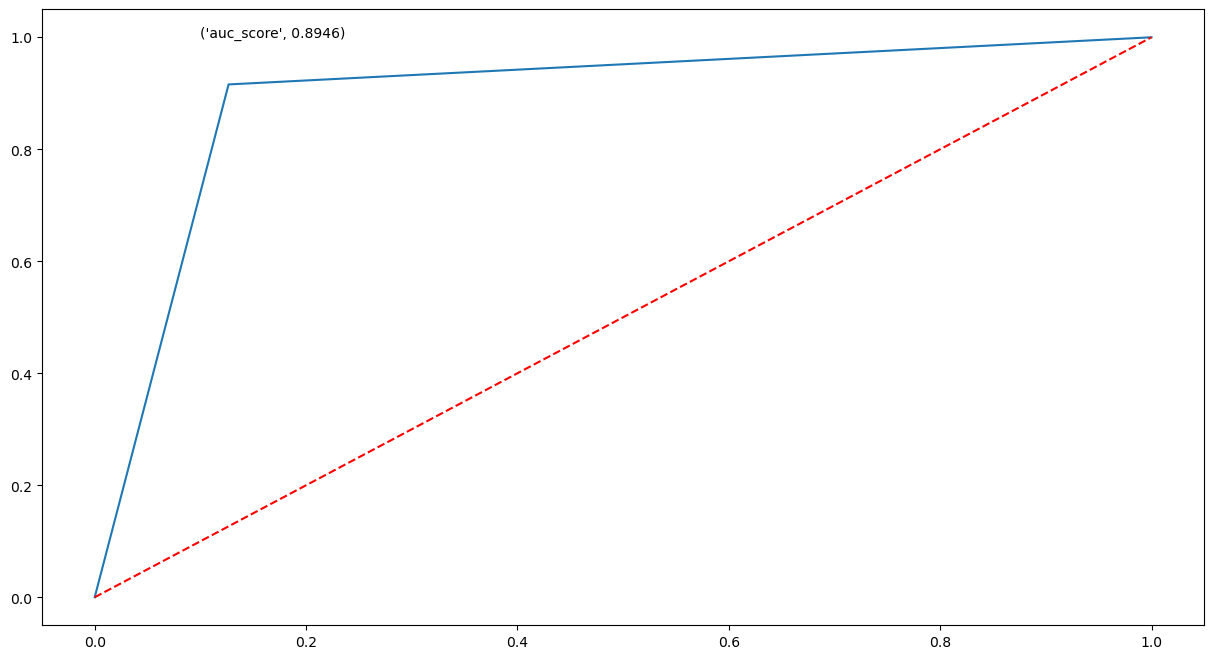

In [44]:
# DecisionTree Model without tuning

model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)

model_performance(model_dt, name = 'Decision Tree Model w/o tuning')

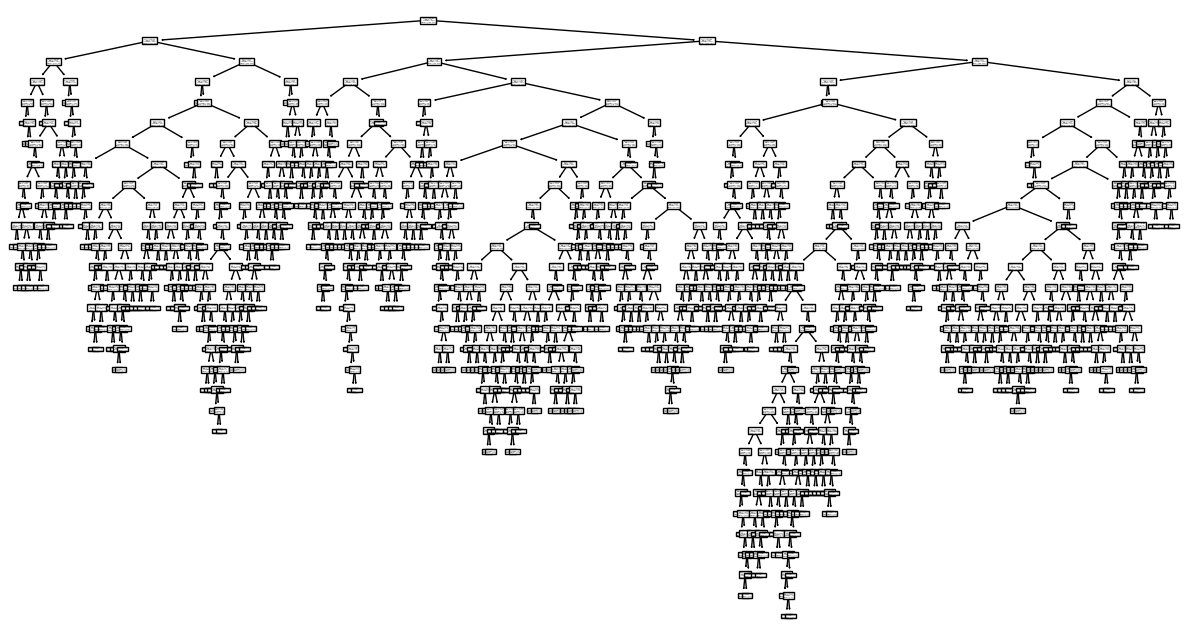

In [45]:
tree.plot_tree(model_dt)
plt.show()

Best parameters are : {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 50, 'min_samples_split': 2}


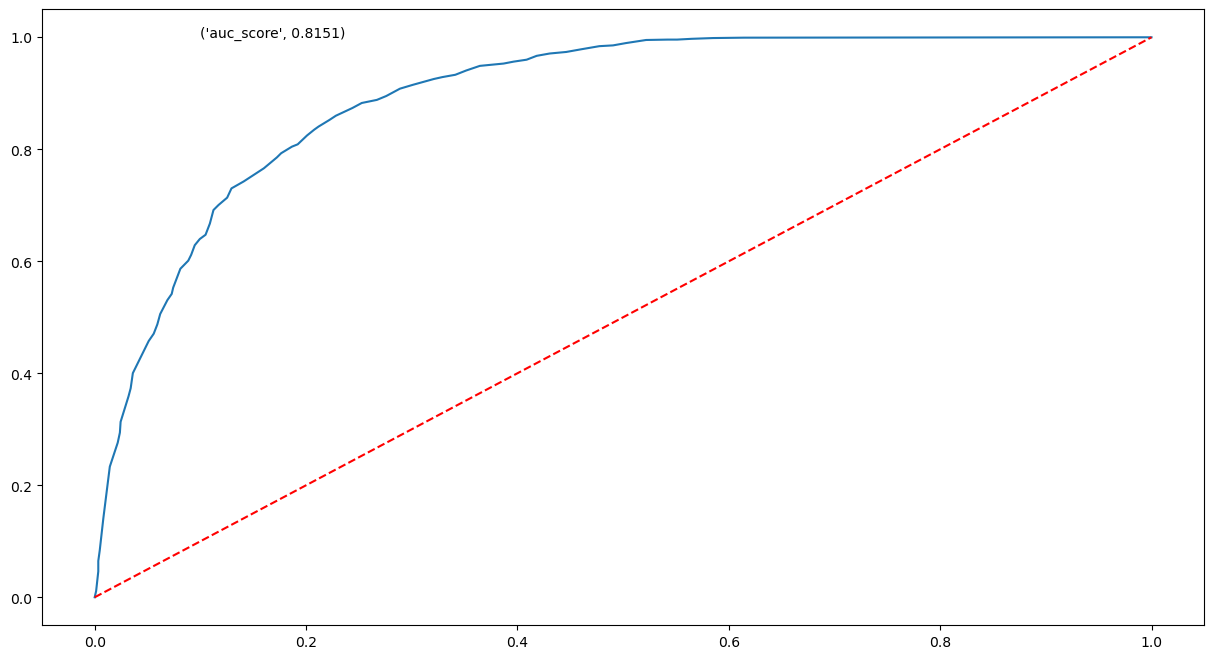

In [46]:
# Decision Tree model with hyperparameter tuning

params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [150, 100, 50],
    'max_features': ['sqrt', 'log2', None],
    'criterion':['gini','entropy']
}

grid_dt = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_dt.best_params_)

model_dt_tuned = DecisionTreeClassifier(criterion = grid_dt.best_params_.get('criterion'),
                                       max_depth = grid_dt.best_params_.get('max_depth'),
                                       min_samples_leaf = grid_dt.best_params_.get('min_samples_leaf'),
                                       min_samples_split = grid_dt.best_params_.get('min_samples_split'),
                                       max_features = grid_dt.best_params_.get('max_features')).fit(xtrain,ytrain)

model_performance(model_dt_tuned,name = 'Decision Tree Model with tuning')



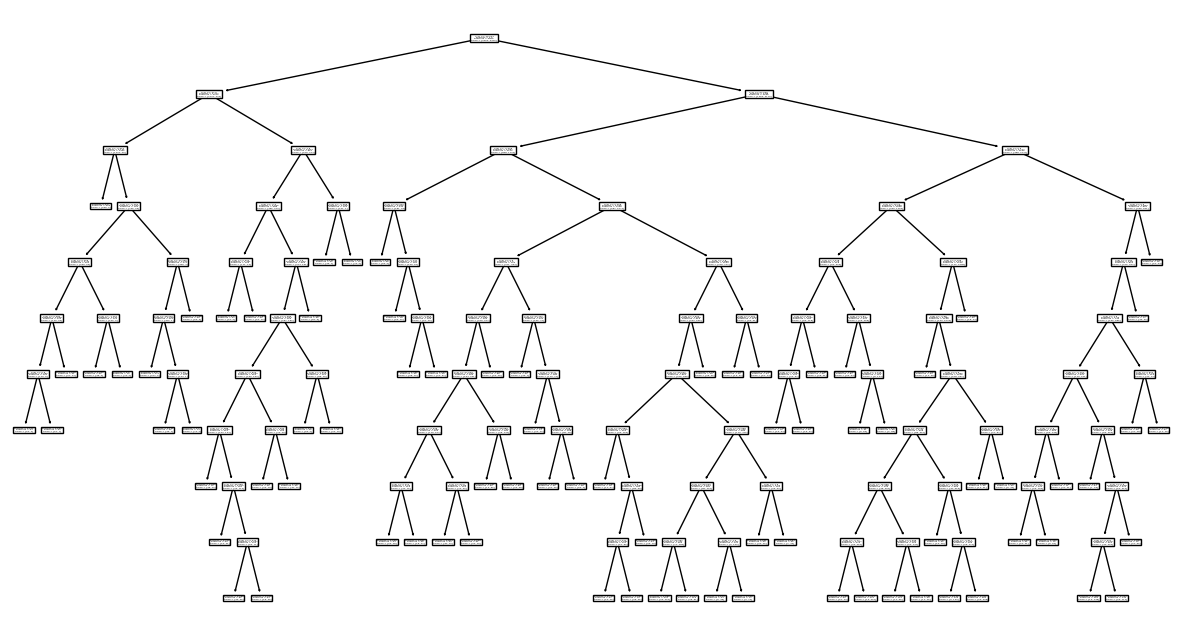

In [47]:
tree.plot_tree(model_dt_tuned)
plt.show()

### RandomForest

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes.

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree.

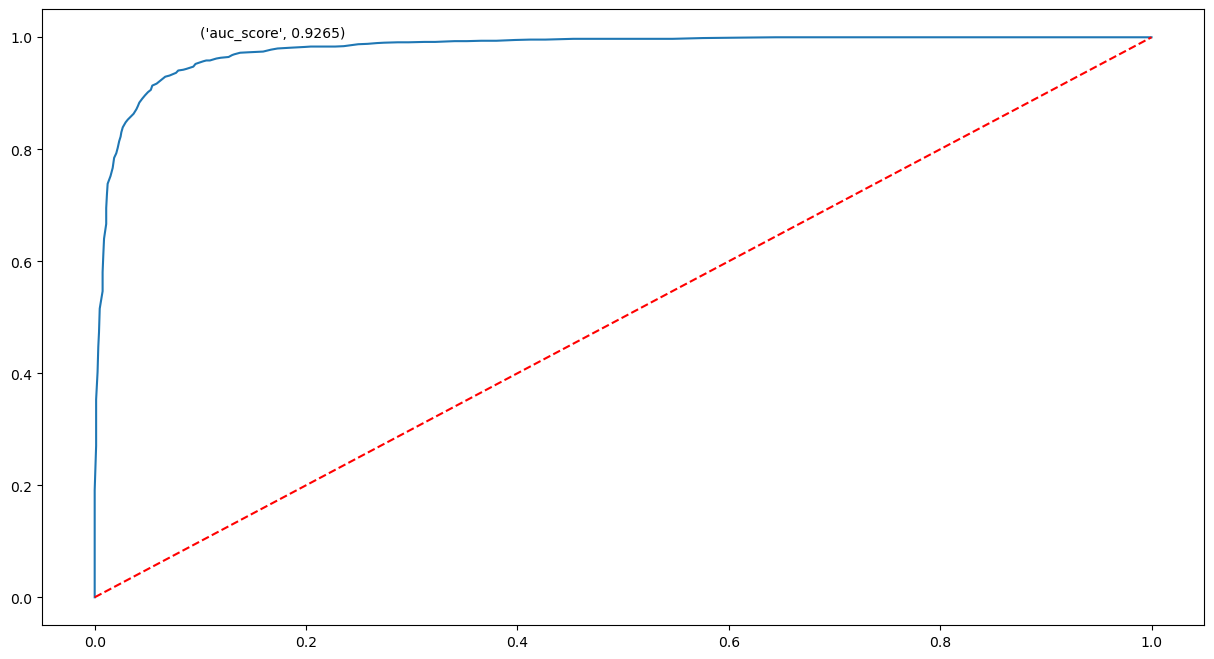

In [48]:
# RandomForest model w/o tuning

model_rf = RandomForestClassifier().fit(xtrain,ytrain)

model_performance(model_rf, name = 'Random Forest Model w/o tuning')

Best parameters are : {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}


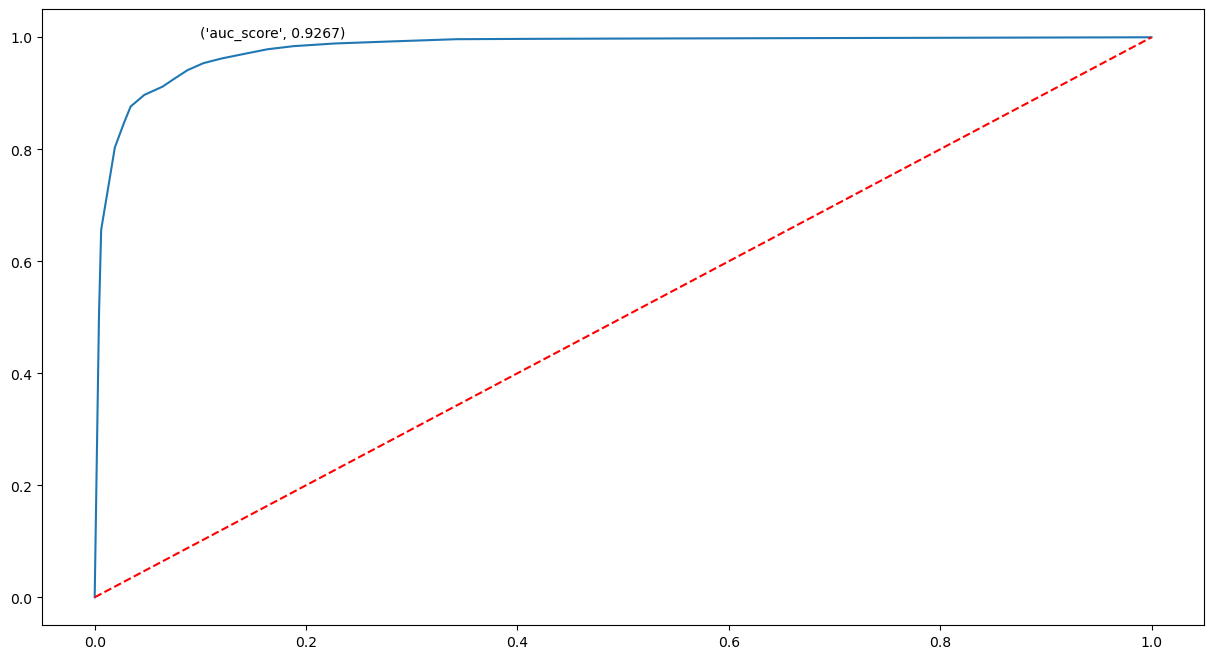

In [49]:
# Random Forest model with Hyperparameter tuning

params = {
    'n_estimators': [10,20,30],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion':['gini','entropy']
}

grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_rf.best_params_)

model_rf_tuned = RandomForestClassifier(n_estimators = grid_rf.best_params_.get('n_estimators'),
                                       max_depth = grid_rf.best_params_.get('max_depth'),
                                       min_samples_split = grid_rf.best_params_.get('min_samples_split'),
                                       min_samples_leaf= grid_rf.best_params_.get('min_samples_leaf'),
                                       max_features= grid_rf.best_params_.get('max_features'),
                                       bootstrap= grid_rf.best_params_.get('bootstrap'),
                                       criterion = grid_rf.best_params_.get('criterion')).fit(xtrain,ytrain)

model_performance(model_rf_tuned,name = 'Random Forest Model with tuning')

### K Nearest Neighbor

KNN is a classification machine learning algorithm used to identify the class of the observation. This algorithm search for K nearest points to determine the class of an observation. To identify the nearest points, it considers the distance metrics like Euclidean, Manhattan, Chebyshev, Hamming, and so on.

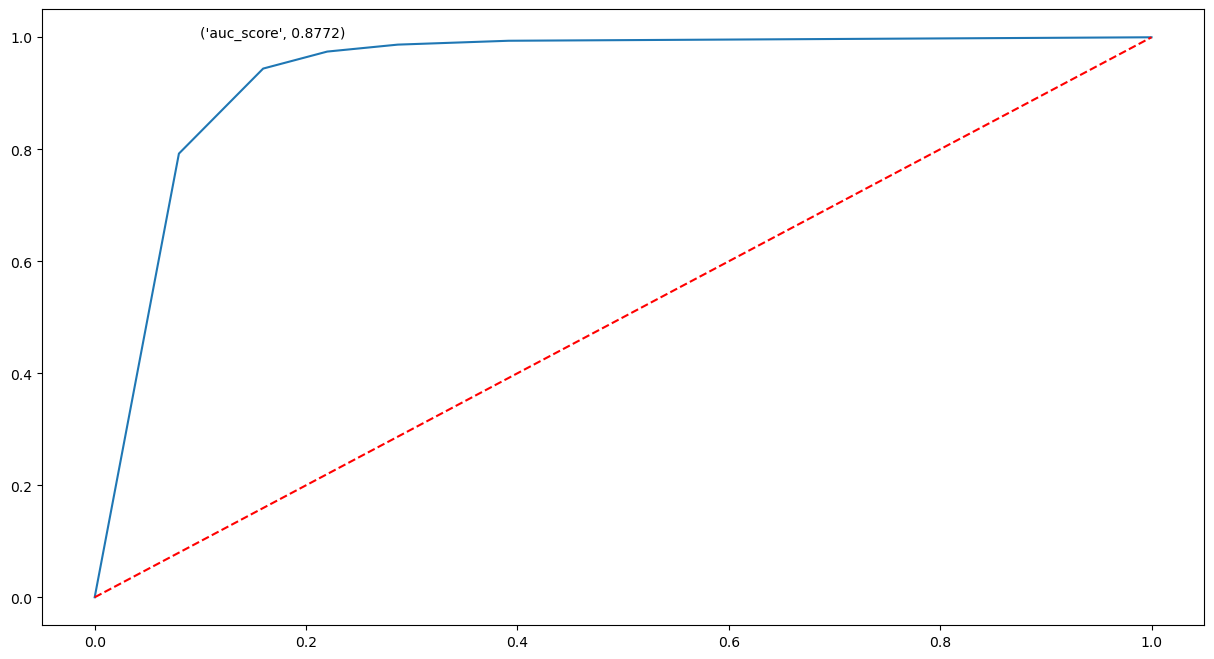

In [50]:
# KNN Model w/o tuning

model_knn = KNeighborsClassifier().fit(xtrain,ytrain)

model_performance(model_knn,'KNN Model w/o tuning')

{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}


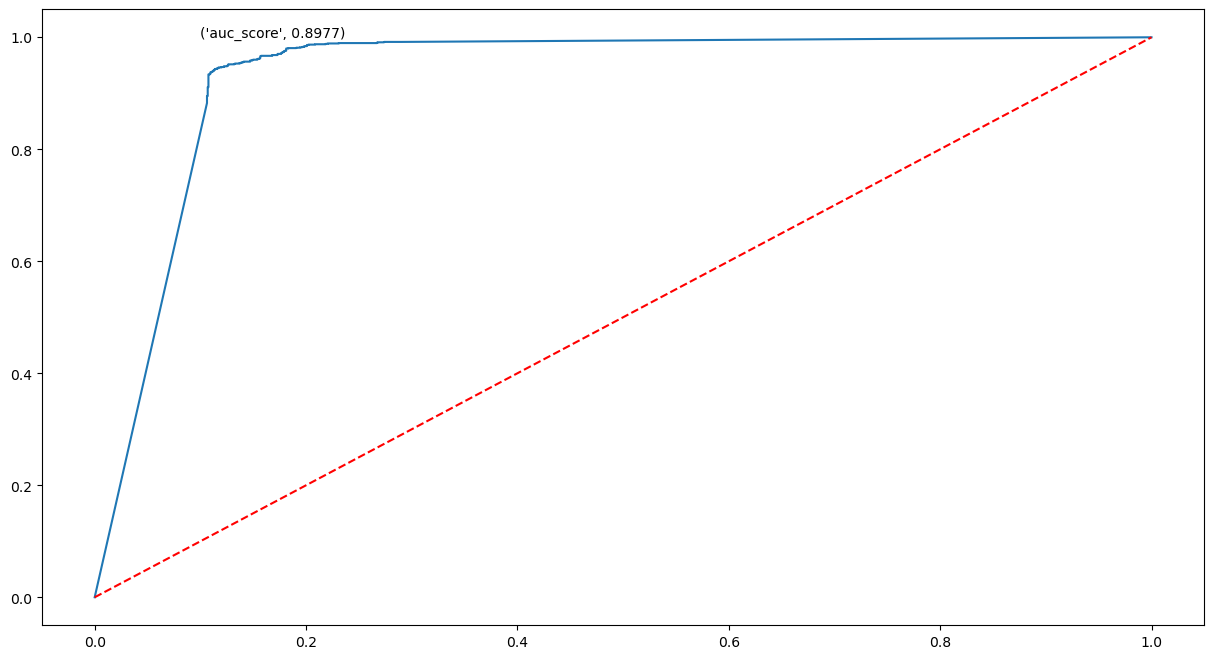

In [51]:
# KNN Model with Hyperparamter tuning

params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric' : ['Manhattan','Euclidean', 'minkowski']
}

grid_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params).fit(xtrain,ytrain)

print(grid_knn.best_params_)

model_knn = KNeighborsClassifier(n_neighbors= grid_knn.best_params_.get('n_neighbors'),
                                weights = grid_knn.best_params_.get('weights'),
                                metric = grid_knn.best_params_.get('metric')).fit(xtrain,ytrain)

model_performance(model_knn,'KNN Model with tuning')

### AdaBoost 

Let us build the AdaBoost classifier with decision trees. The model creates several stumps (decision tree with only a single decision node and two leaf nodes) on the train set and predicts the class based on these weak learners (stumps). For the first model, it assigns equal weights to each sample. It assigns the higher weight for the wrongly predicted samples and lower weight for the correctly predicted samples. This method continues till all the observations are correctly classified or the predefined number of stumps is created.

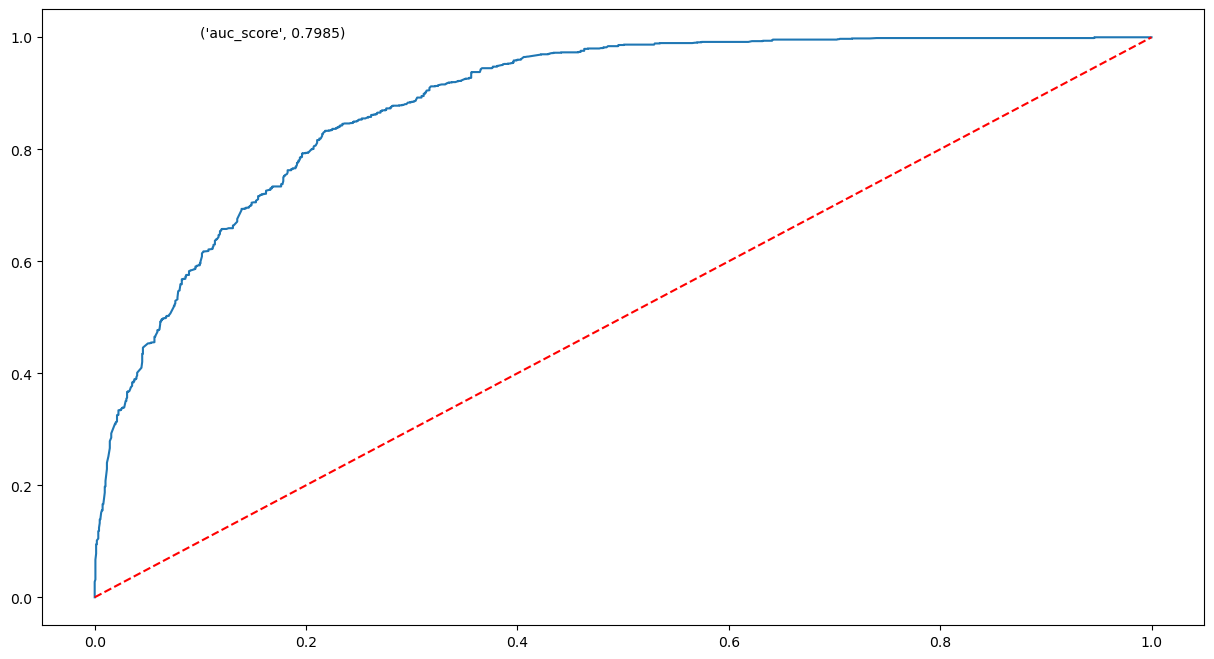

In [52]:
# AdaBoost Model 

model_ab = AdaBoostClassifier().fit(xtrain,ytrain)

model_performance(model_ab,name = 'AdaBoost Model w/o tuning')

Best parameters are : {'learning_rate': 1, 'n_estimators': 200}


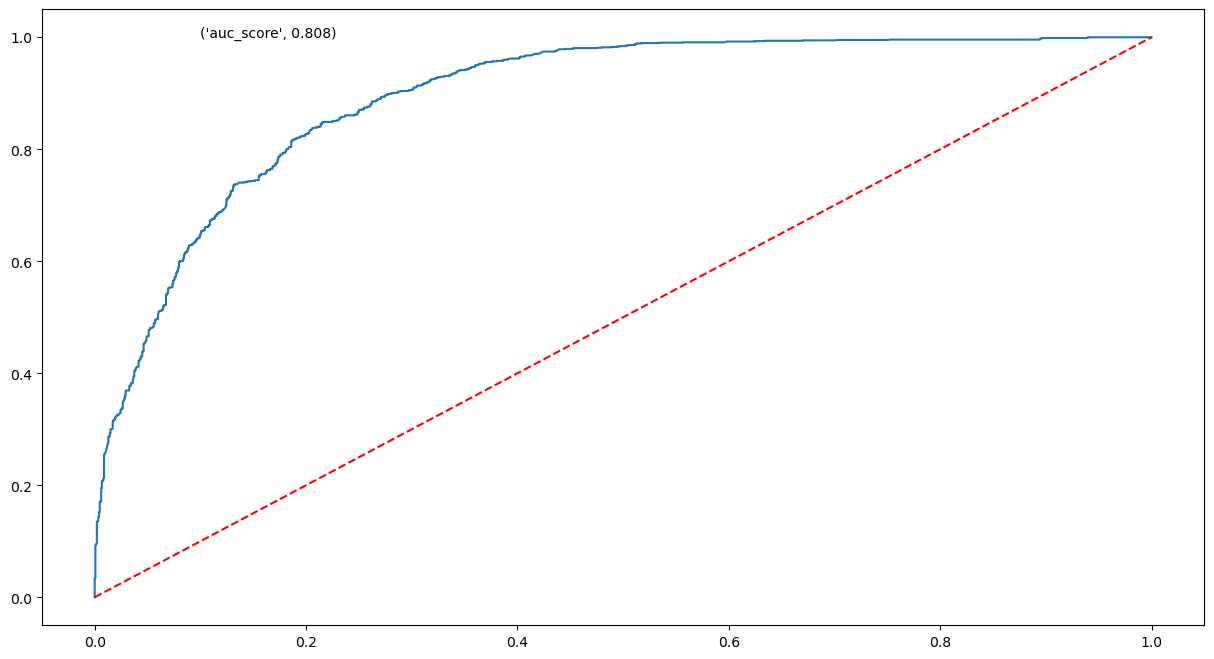

In [53]:
# Adaboost Model with Hyperparameter tuning

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ab = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_ab.best_params_)

model_ab_tuned = AdaBoostClassifier(n_estimators = grid_ab.best_params_.get('n_estimators'),
                                   learning_rate = grid_ab.best_params_.get('learning_rate')).fit(xtrain,ytrain)

model_performance(model_ab_tuned,name = 'AdaBoost Model with tuning')

### GradientBoosting

This method optimizes the differentiable loss function by building the number of weak learners (decision trees) sequentially. It considers the residuals from the previous model and fits the next model to the residuals. The algorithm uses a gradient descent method to minimize the error.

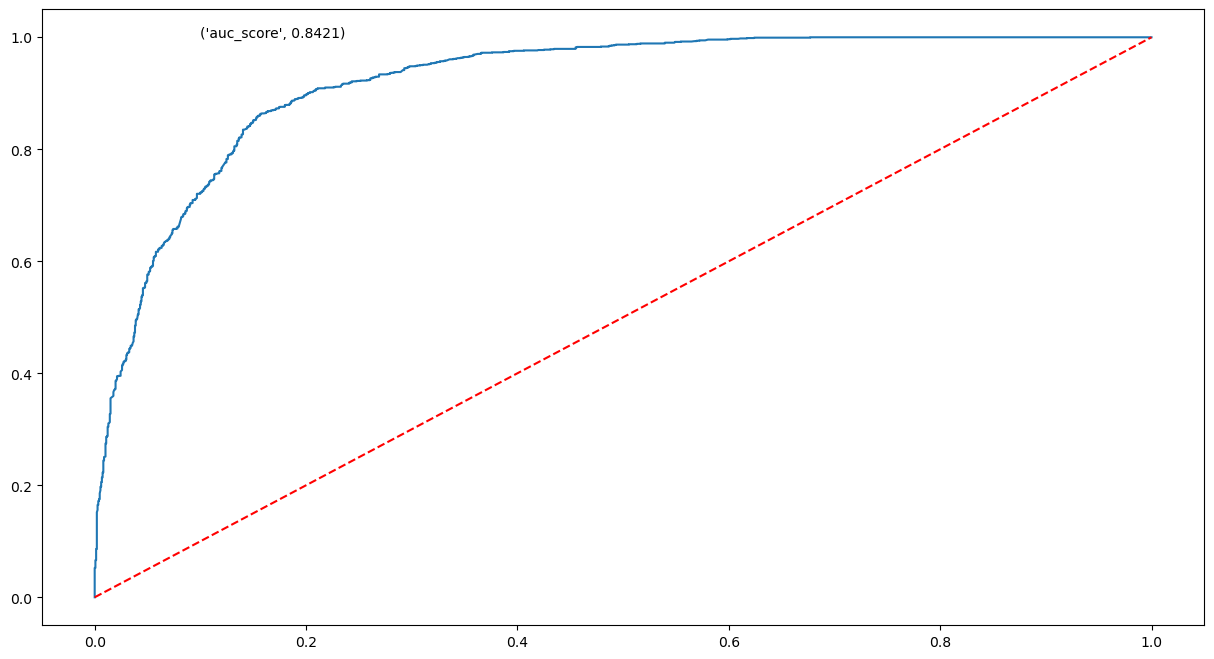

In [54]:
# Gradient Boosting Model

model_gb = GradientBoostingClassifier().fit(xtrain,ytrain)

model_performance(model_gb, name = 'GradientBoosting Model w/o tuning')

Best parameters are : {'learning_rate': 1, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}


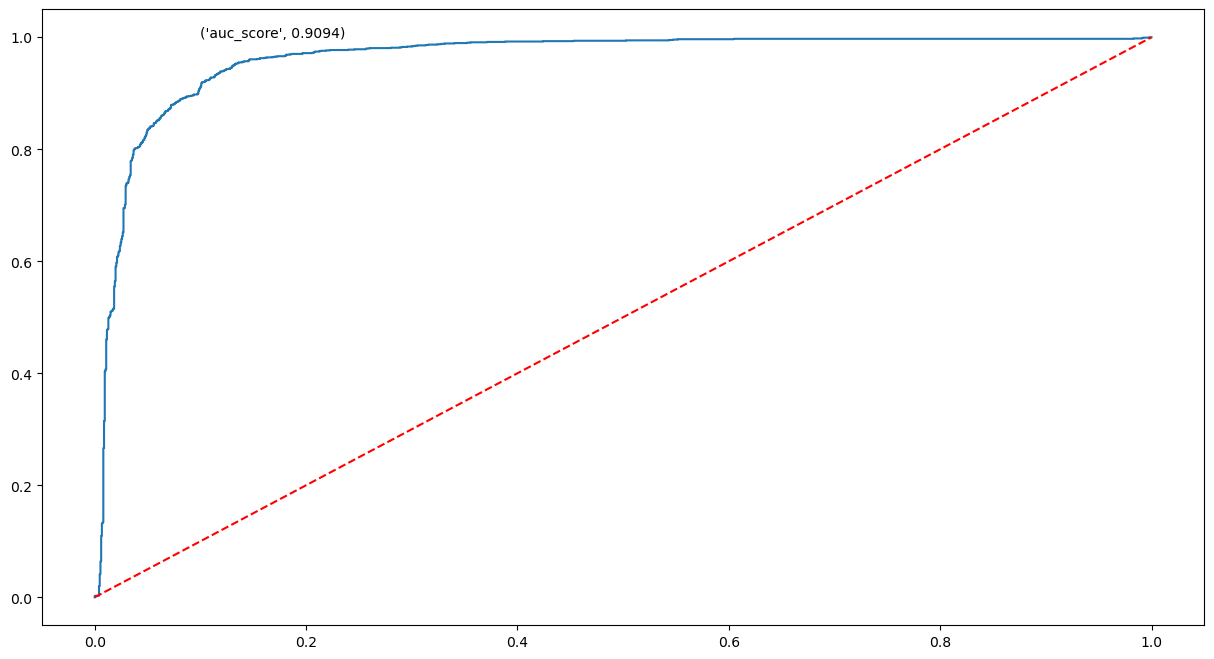

In [55]:
# Gradient Boosting Model with Hyperparameter tuning

params = {
    'n_estimators': [10,20,30],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_gb = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_gb.best_params_)

model_gb_tuned = GradientBoostingClassifier(n_estimators = grid_gb.best_params_.get('n_estimators'),
                                           learning_rate = grid_gb.best_params_.get('learning_rate'),
                                           max_depth = grid_gb.best_params_.get('max_depth'),
                                           min_samples_split = grid_gb.best_params_.get('min_samples_split'),
                                           min_samples_leaf = grid_gb.best_params_.get('min_samples_leaf'),
                                           max_features = grid_gb.best_params_.get('max_features')).fit(xtrain,ytrain)

model_performance(model_gb_tuned, name = 'GradientBoosting Model with tuning')

### XGBoost

XGBoost (extreme gradient boost) is an alternative form of gradient boosting method. This method generally considers the initial prediction as 0.5 and build the decision tree to predict the residuals. It considers the regularization parameter to avoid overfitting.

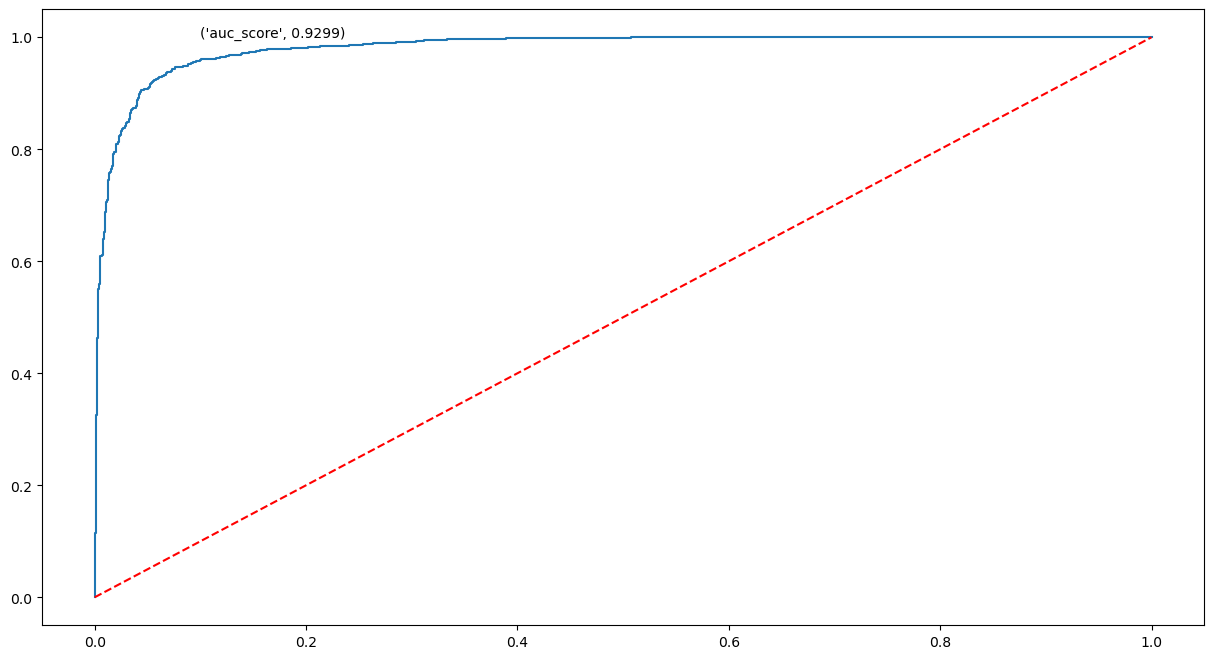

In [56]:
# XGB Model

model_xgb = XGBClassifier().fit(xtrain,ytrain)

model_performance(model_xgb,name = 'XGB Model w/o tuning')

Best parameters are : {'gamma': 0, 'learning_rate': 1, 'max_depth': 7, 'n_estimators': 75}


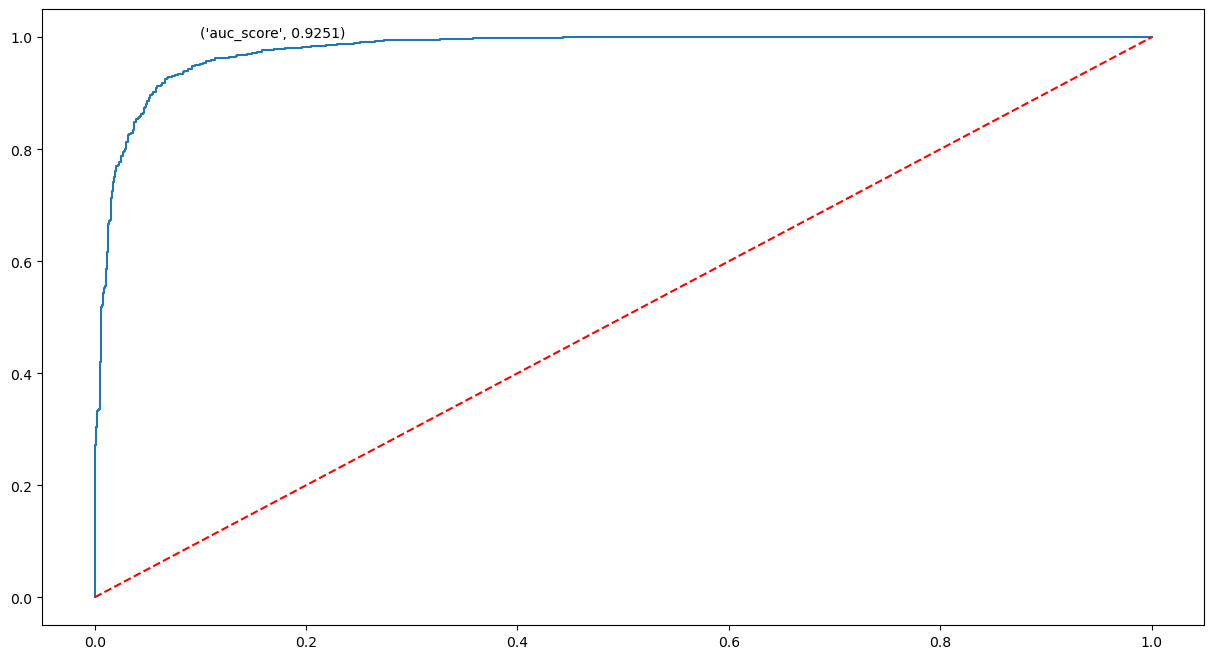

In [57]:
# XGB Model with Hyperparameter tuning

params = {
    'n_estimators': [25,50,75],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.5]
}

grid_xgb = GridSearchCV(estimator = XGBClassifier(), param_grid = params).fit(xtrain,ytrain)

print('Best parameters are :',grid_xgb.best_params_)

model_xgb_tuned = XGBClassifier(n_estimators = grid_xgb.best_params_.get('n_estimators'),
                               learning_rate = grid_xgb.best_params_.get('learning_rate'),
                               max_depth = grid_xgb.best_params_.get('max_depth'),
                               gamma = grid_xgb.best_params_.get('gamma')).fit(xtrain,ytrain)

model_performance(model_xgb_tuned,name = 'XGB Model with tuning')

### Stacking Classifier

Stacking is a machine learning technique that takes several classification or regression models and uses their predictions as the input for the meta-classifier (final classifier) or meta-regressor (final regressor)

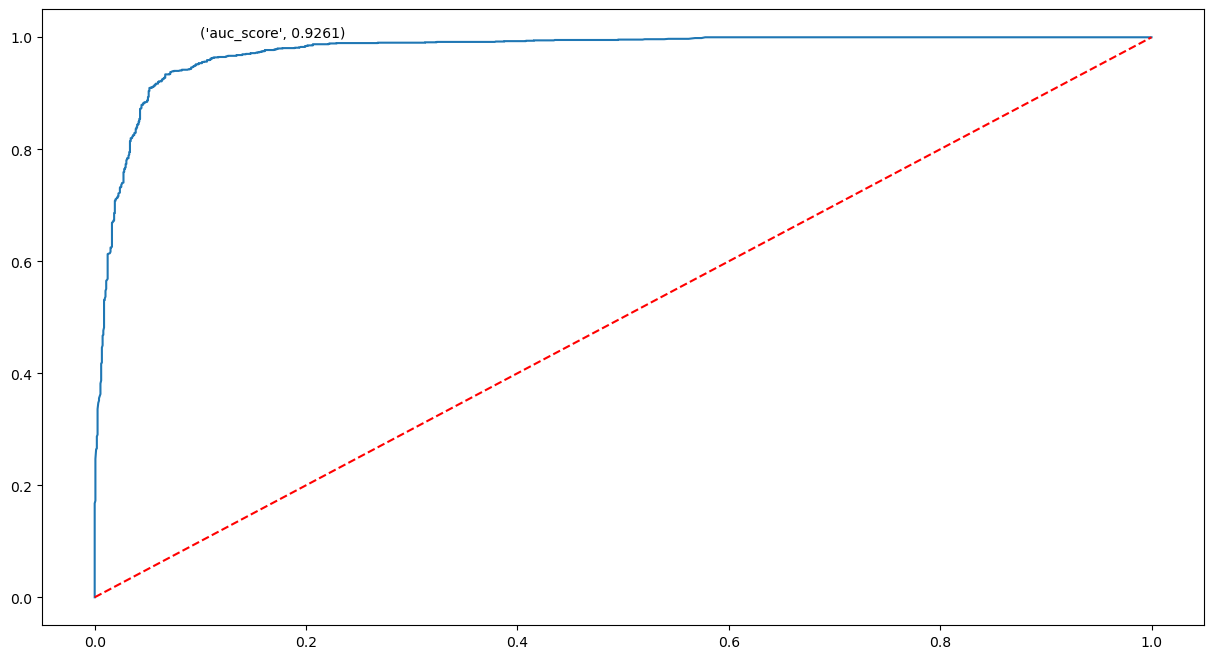

In [58]:
base_learners = [('model_dt',DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf = 50,
                                                   min_samples_split = 2)),
                ('model_rf',RandomForestClassifier(criterion = 'gini',  min_samples_split = 2, n_estimators = 30,
                                                  min_samples_leaf = 1, max_features = 'log2')),
                ('model_knn',KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski'))]

model_stack = StackingClassifier(estimators = base_learners, final_estimator = GaussianNB(), n_jobs = -1).fit(xtrain,ytrain)

model_performance(model_stack,'Stacking Model')

### Comparing performance's of all Models

In [59]:
def highlight_row(df):
    color_green = ['background-color : lightgreen']*len(df)
    color_white = ['background-color : white']*len(df)
    
    if df['Remarks'] == 'Good Fit':
        return color_green
    else:
        return color_white

In [60]:
performance_df.style.apply(highlight_row, axis = 1)

,Model_name,Train_Accuracy,Train_F1score,Test_Accuracy,Test_F1score,AUC_Score,Remarks
0,Logistic Model,0.787656,0.796565,0.781968,0.793506,0.859039,Under Fit
1,Decision Tree Model w/o tuning,1.000000,1.000000,0.894412,0.896016,0.894551,Over Fit
2,Decision Tree Model with tuning,0.836003,0.840571,0.814878,0.820598,0.895201,Good Fit
3,Random Forest Model w/o tuning,1.000000,1.000000,0.926294,0.928166,0.979363,Over Fit
4,Random Forest Model with tuning,1.000000,1.000000,0.926637,0.927260,0.979737,Over Fit
5,KNN Model w/o tuning,0.909919,0.916496,0.876586,0.886935,0.934705,Good Fit
6,KNN Model with tuning,1.000000,1.000000,0.897155,0.904519,0.933112,Over Fit
7,AdaBoost Model w/o tuning,0.808670,0.818309,0.798080,0.809200,0.884996,Under Fit
8,AdaBoost Model with tuning,0.826304,0.834870,0.807679,0.816607,0.895185,Good Fit
9,GradientBoosting Model w/o tuning,0.866716,0.873694,0.841618,0.851064,0.920519,Good Fit


From above we can see that some models has performed good in training set and for the unseen data its performance is comparatively reduced which is clearly an overfitten model. And also some models performance is better in both training and unseen data. On those models KNN model's performance is high than other models. So we can consider that model as our final model